   0.48  -0.22  -1
0 -0.85   0.52  -1
1 -0.95  -0.87   1
2 -0.65   0.47  -1
3  0.77   0.62  -1
4 -0.68  -0.67   1


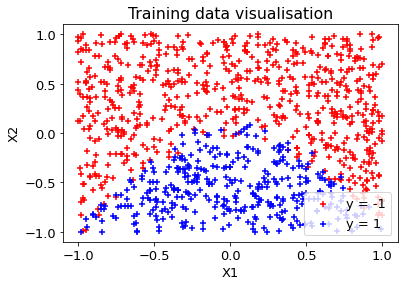

θ =  [-1.5622853140850055, -0.24543541113842676, -4.978713648297038]


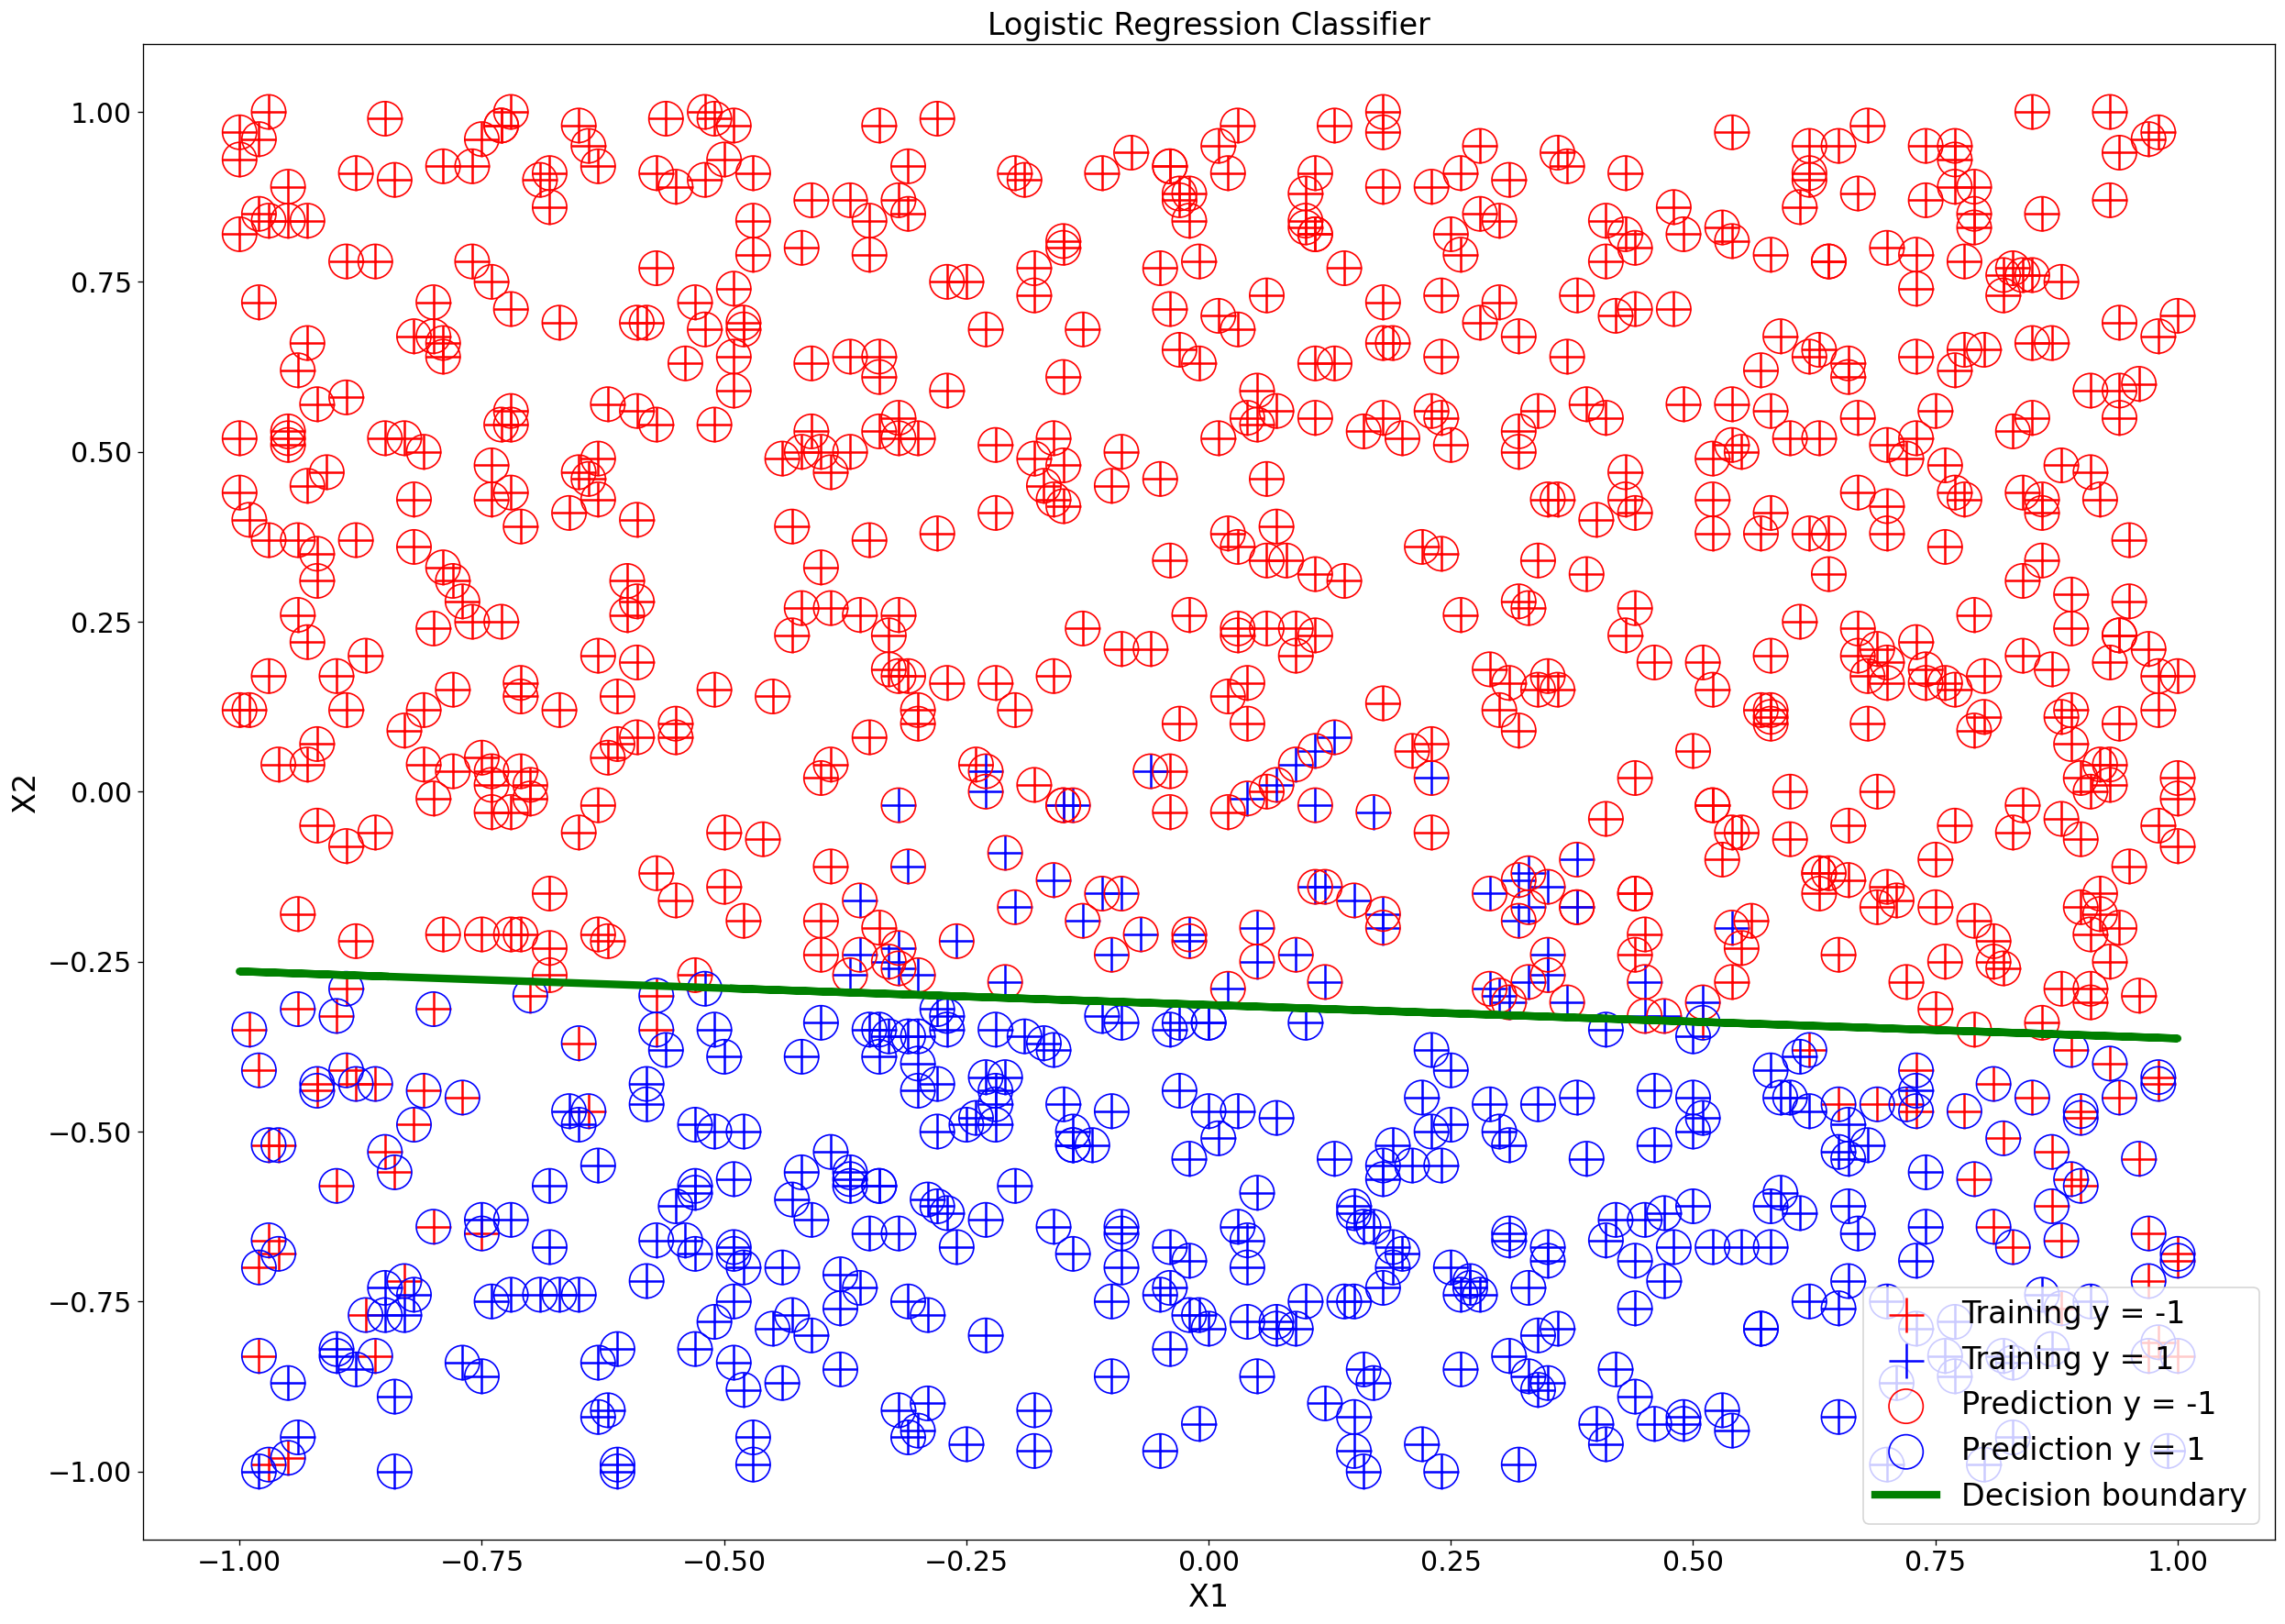

C = 0.001 
 θ = [-0.19742928858189362, -0.028992723652894636, -0.48004913473700456]


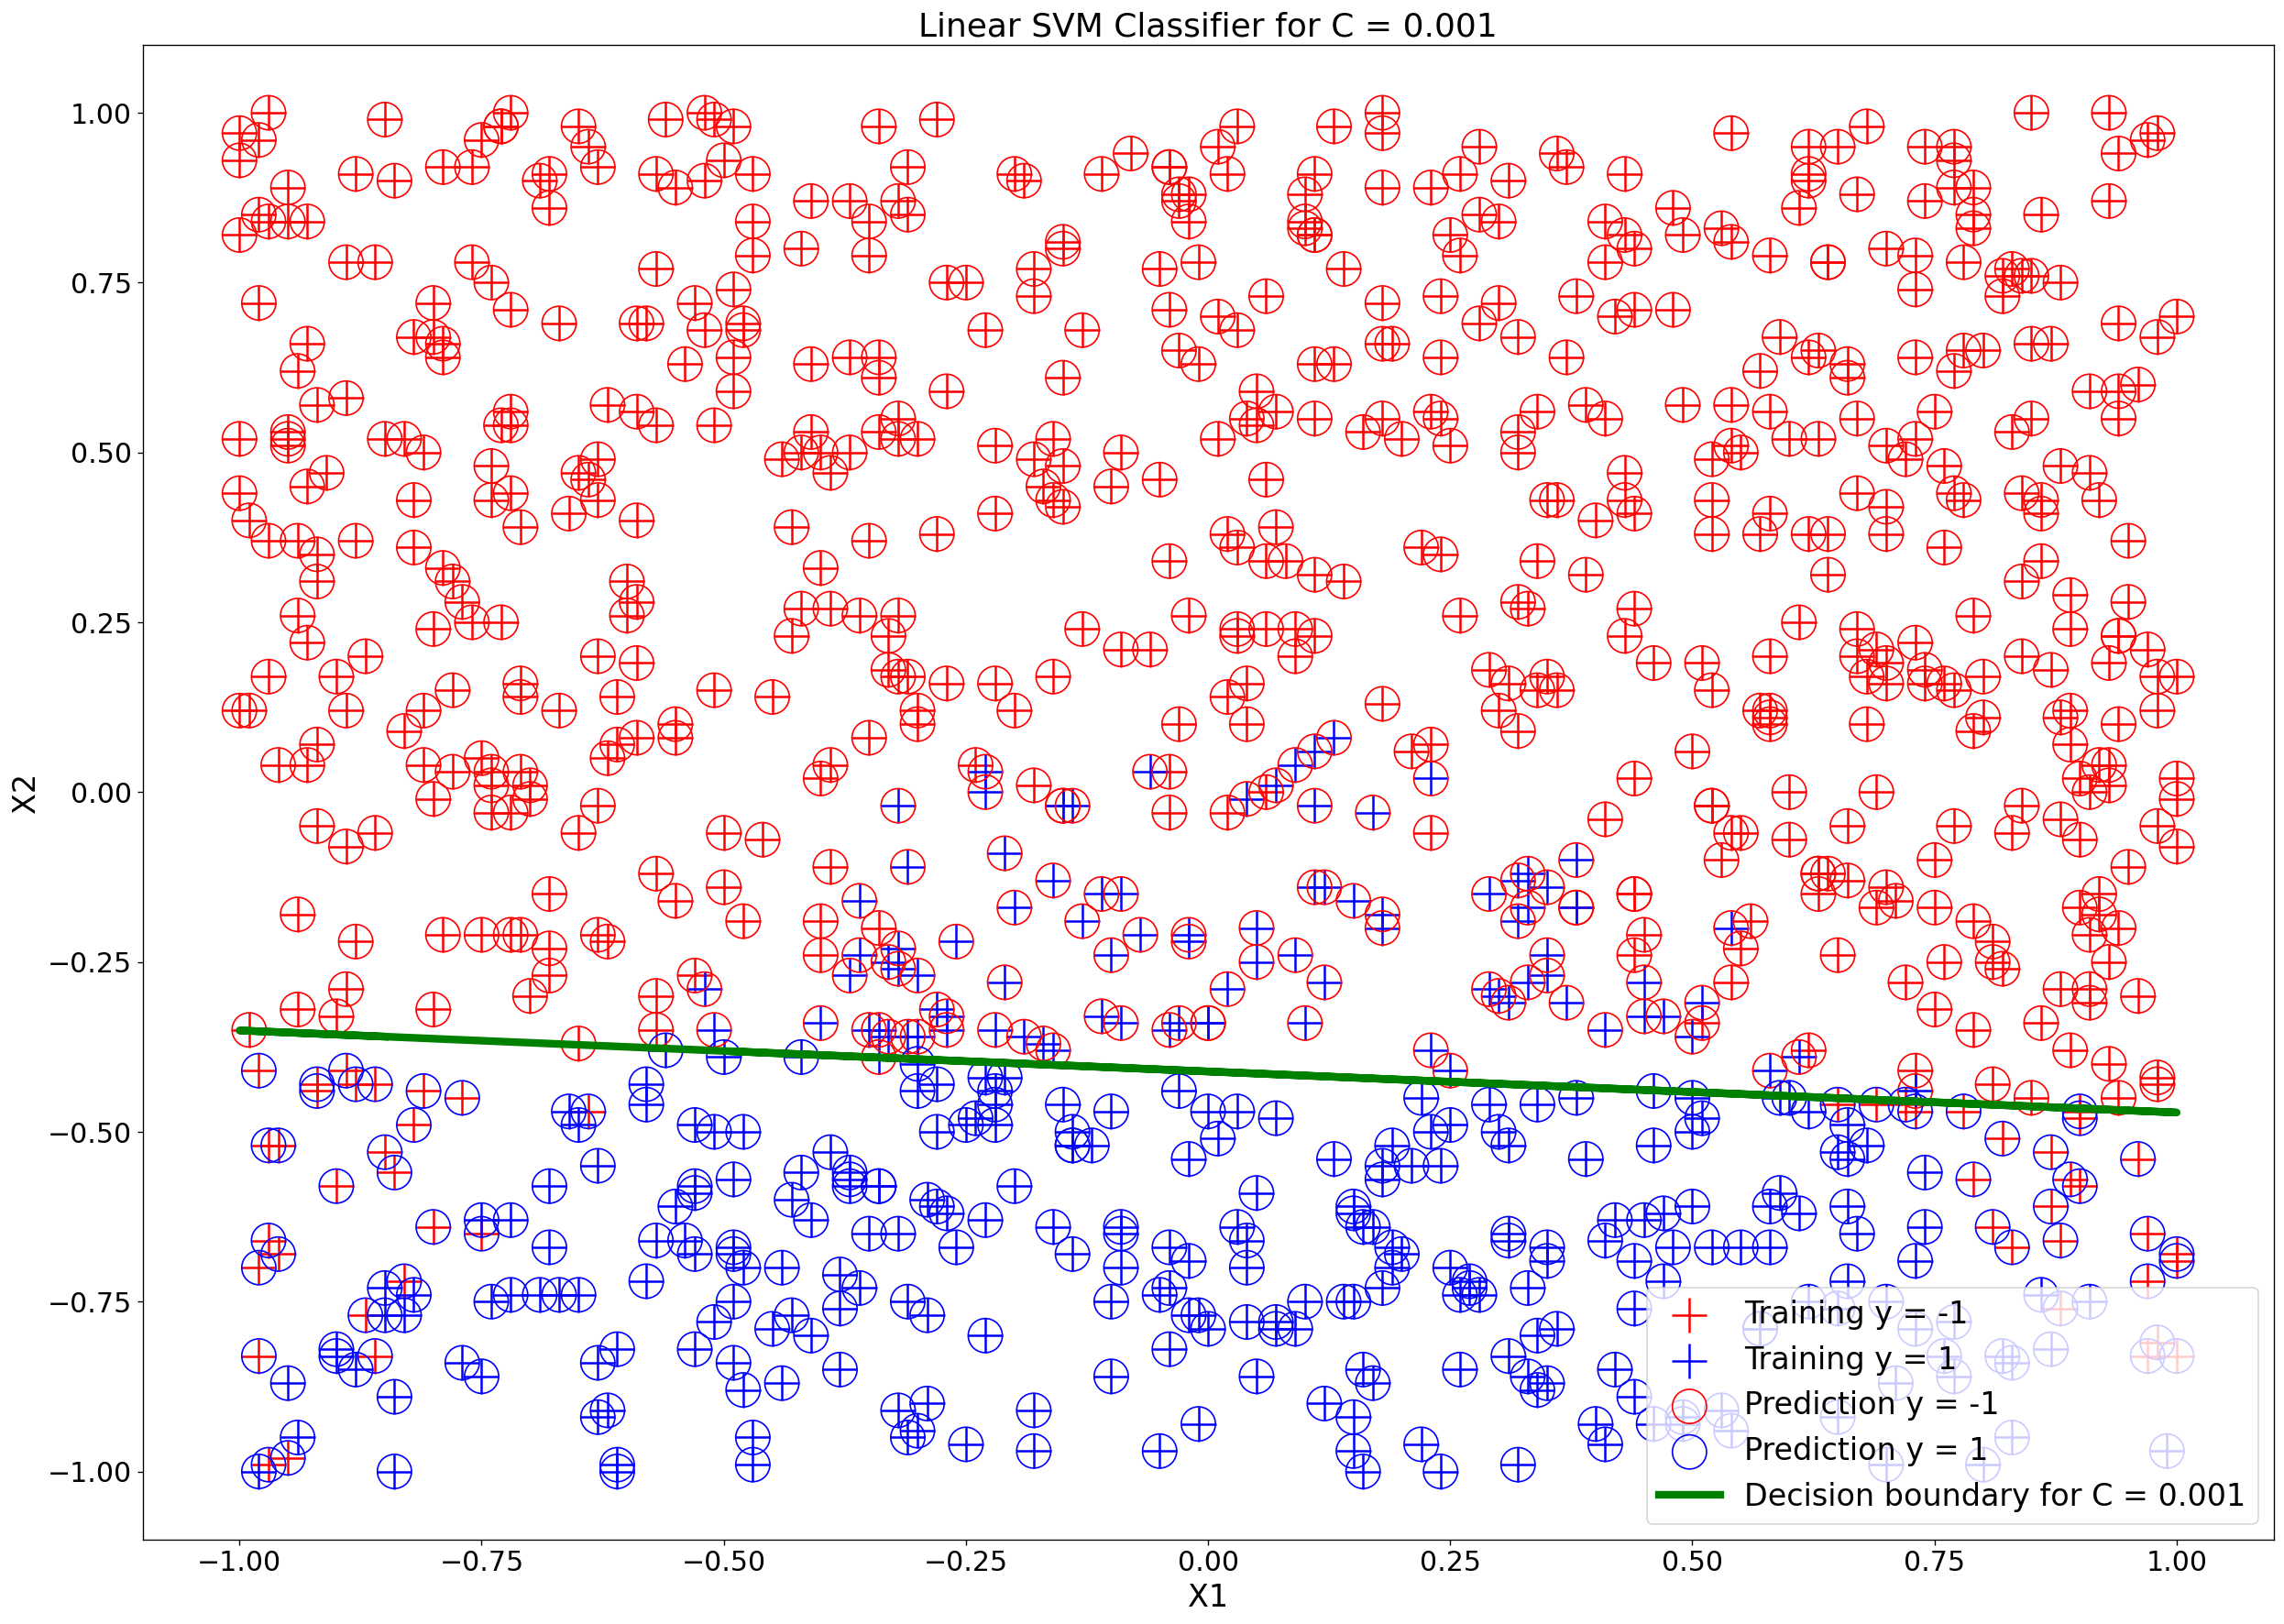

C = 1.000 
 θ = [-0.5573128245141616, -0.08408885457142166, -1.828896179595896]


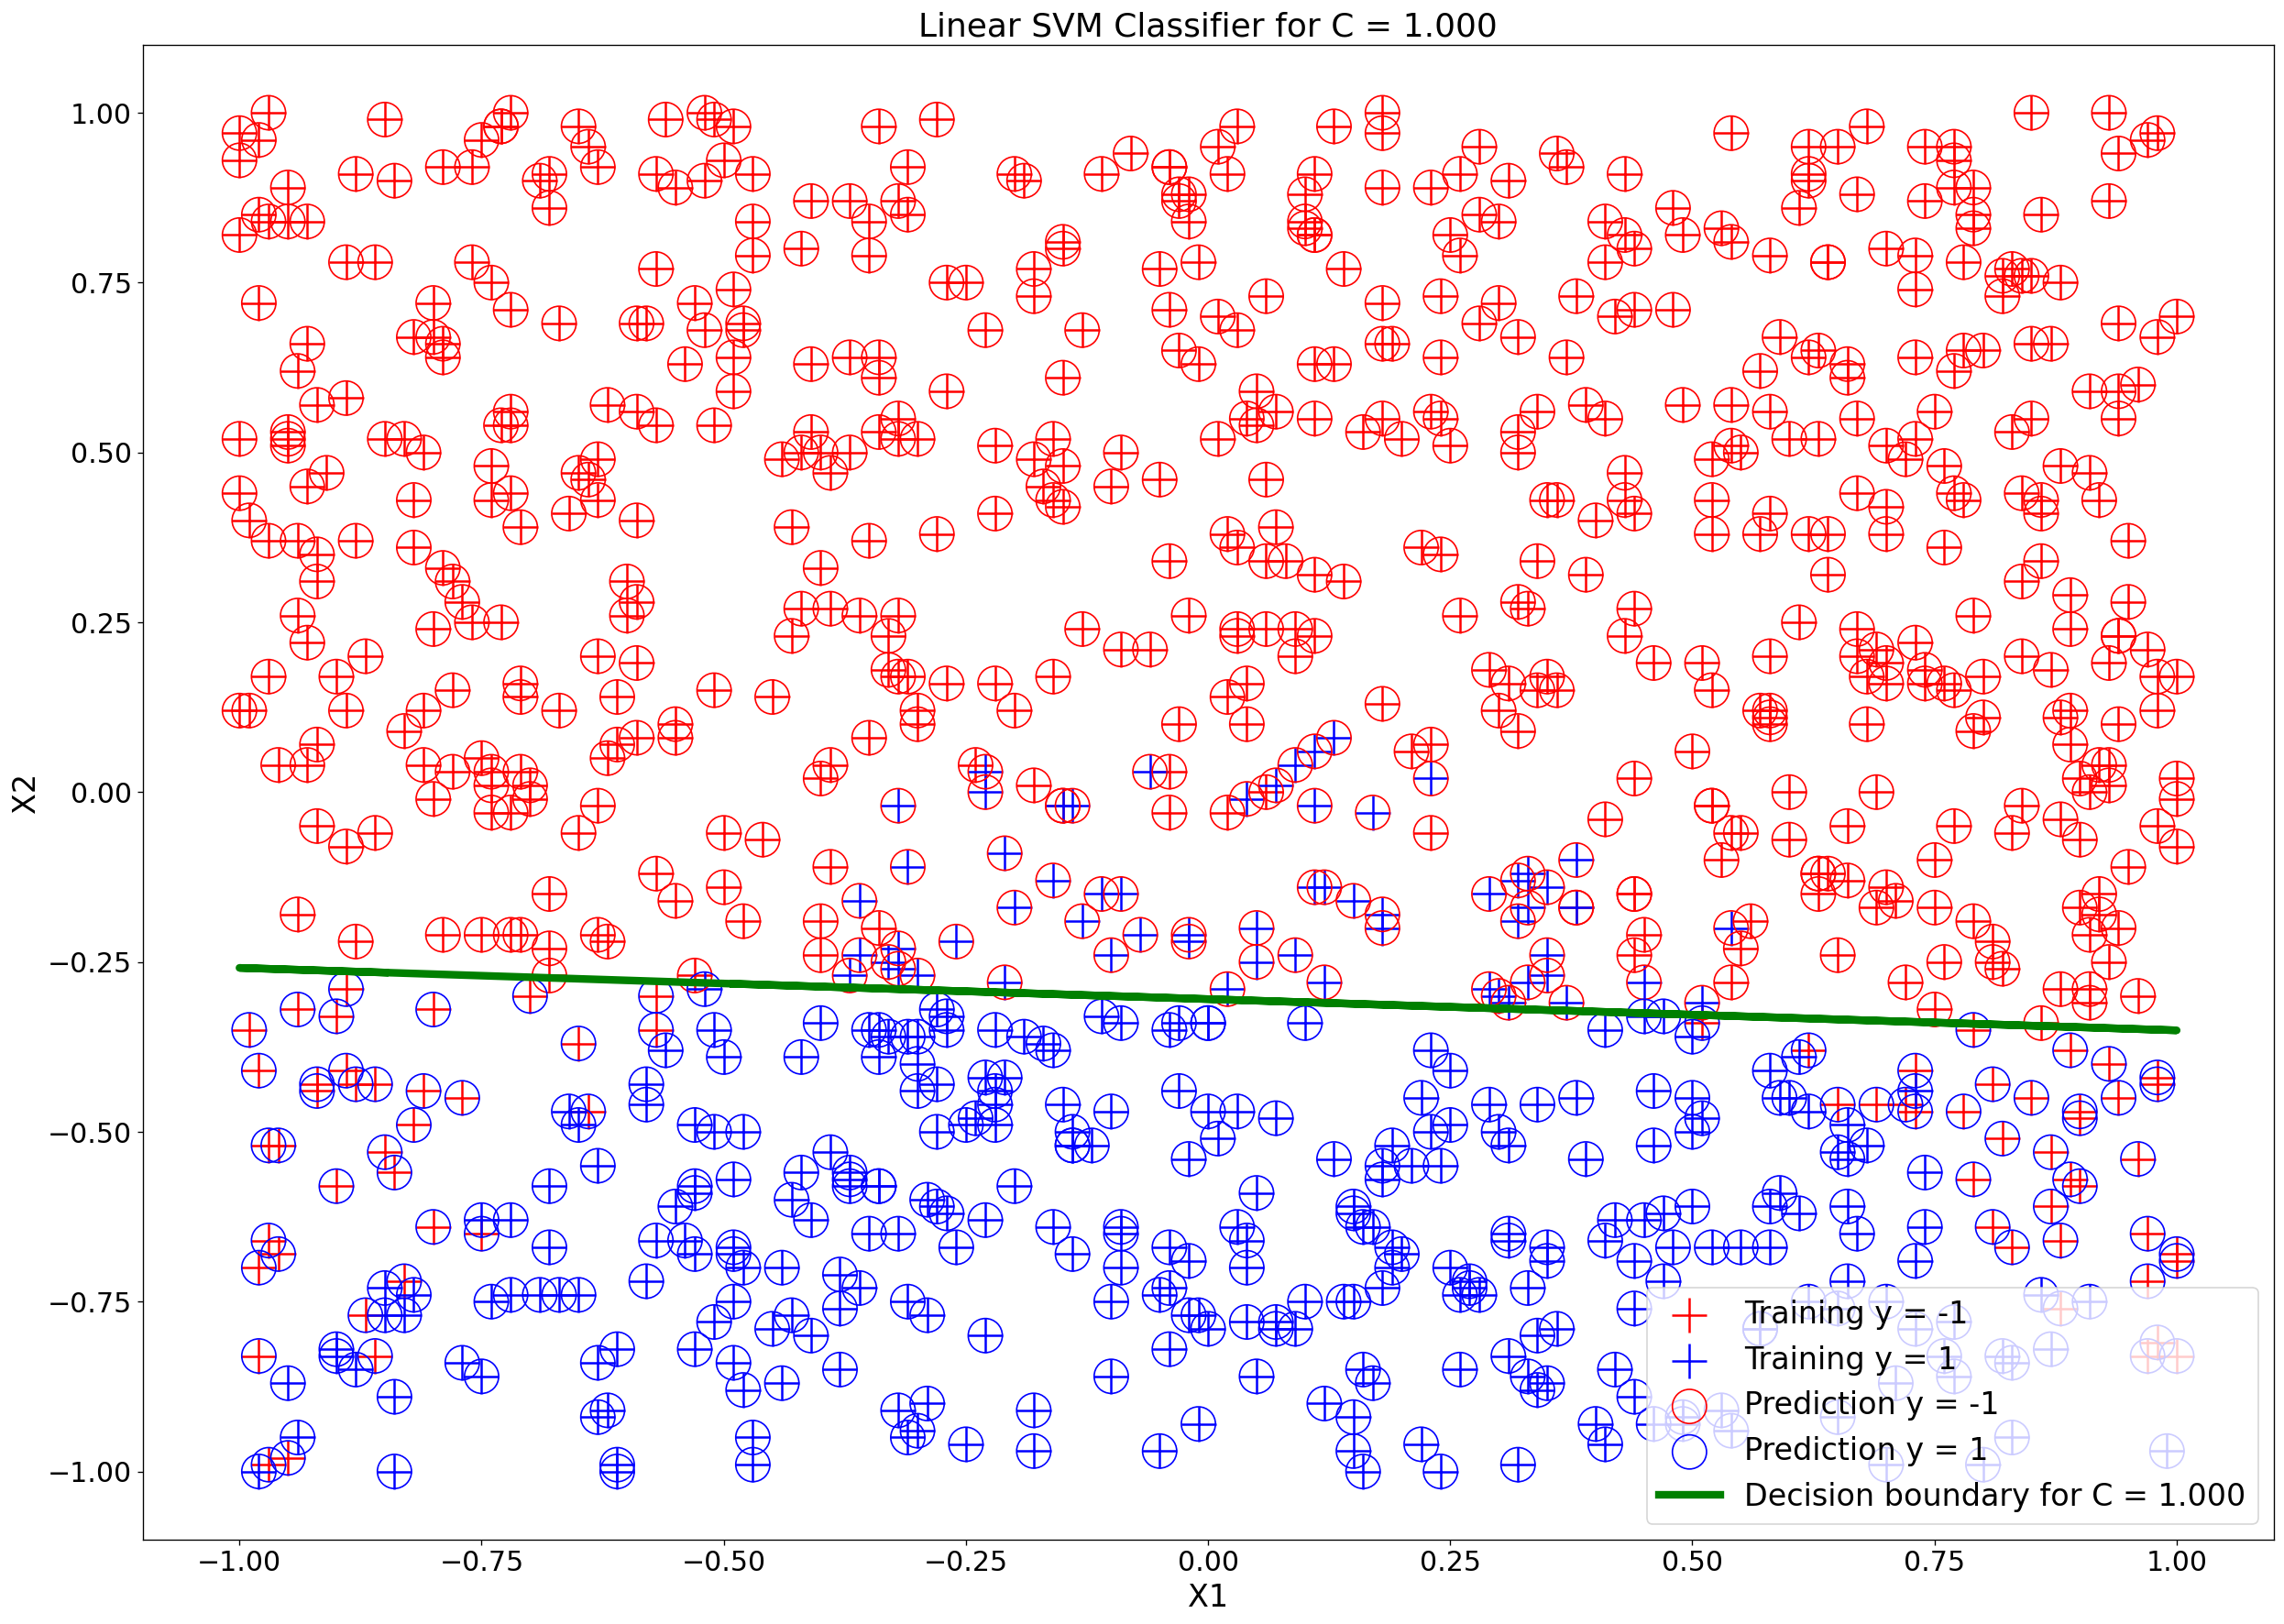

C:\Users\Cormac\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 1000.000 
 θ = [-0.7978185168304084, -0.49833601410913014, -2.1113774673063457]


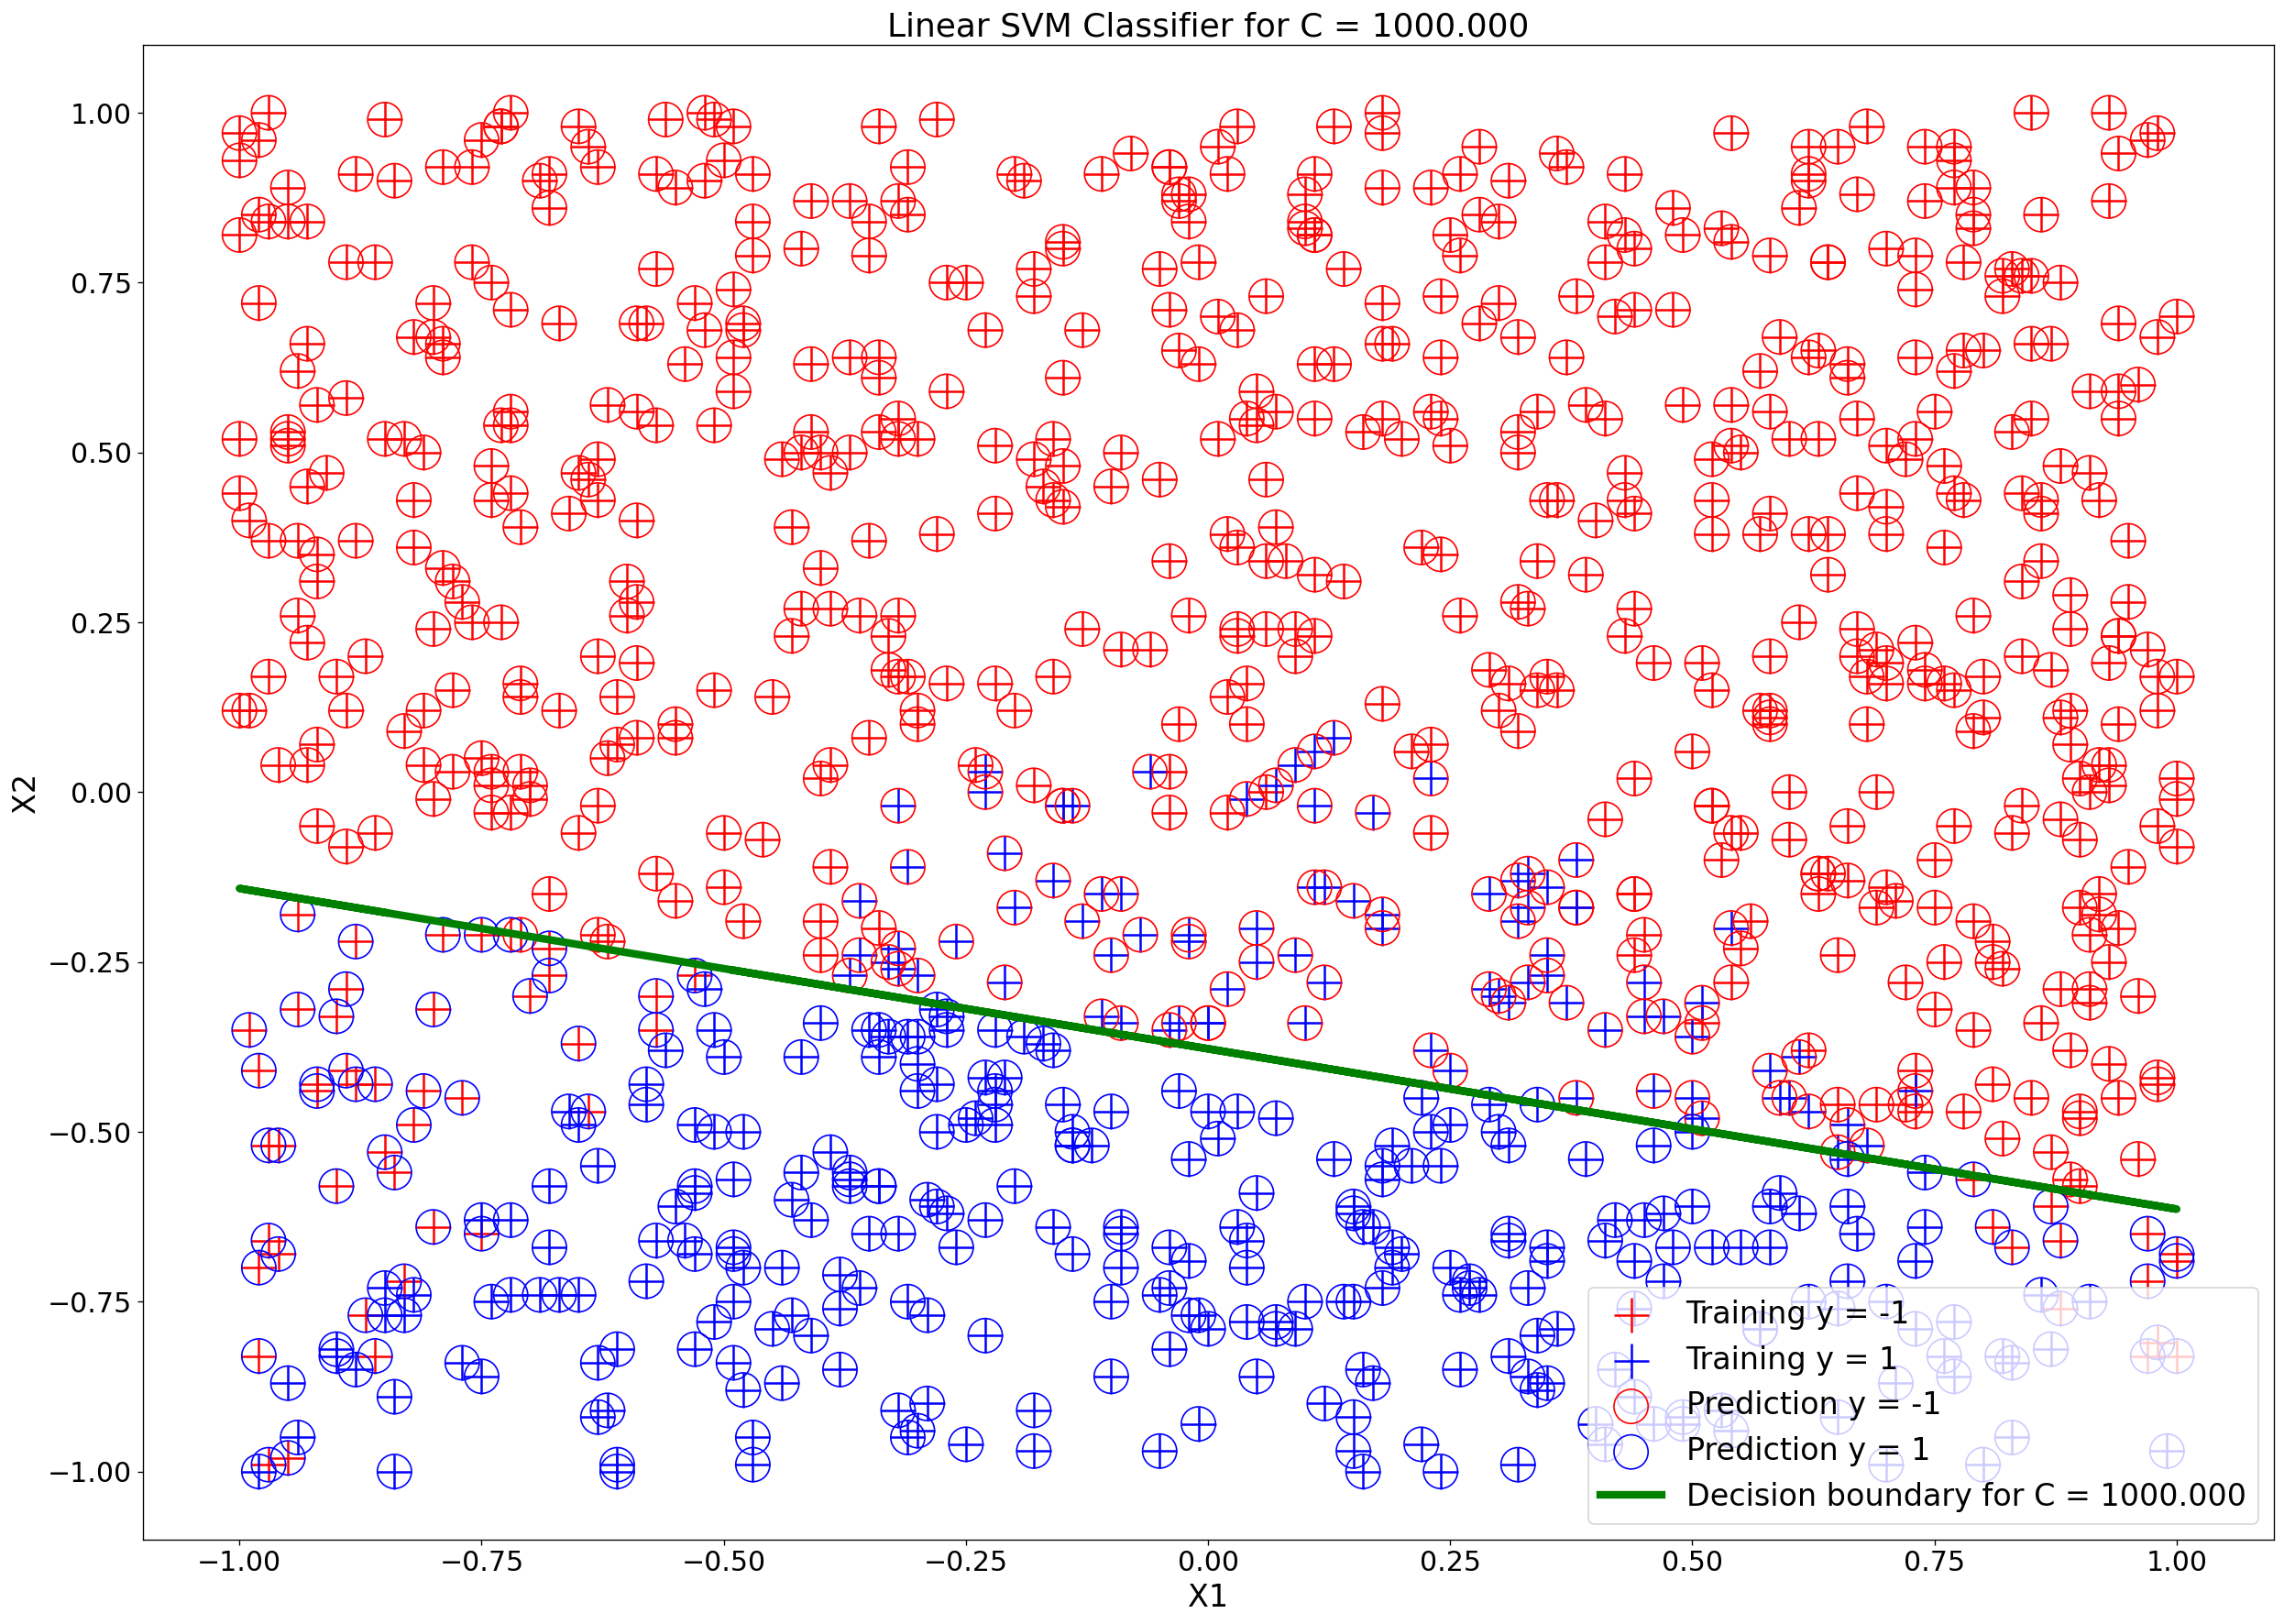

θ = [-0.05559401  0.01781205 -6.63393089 -6.74017505  0.8710698 ]
J(θ) = 0.180762

θ_baseline = [-1, 0, 0, 0, 0]
J(θ_baseline) = 0.959342


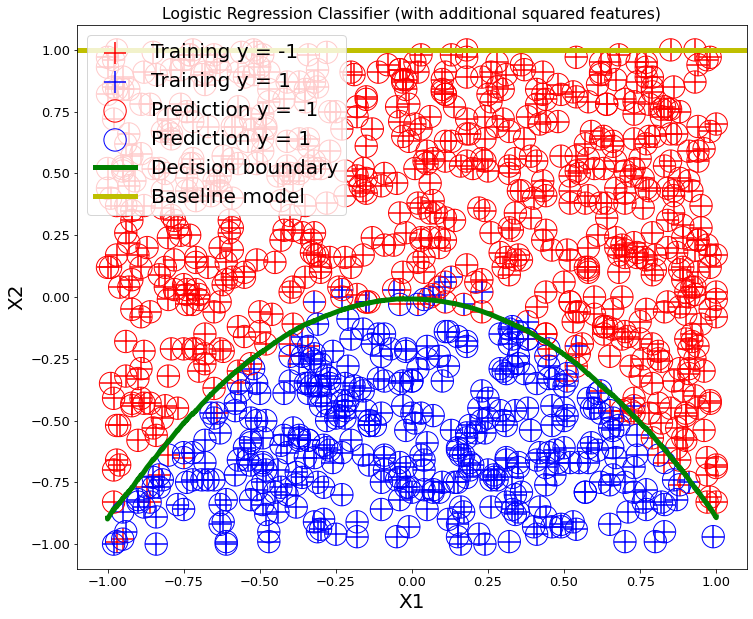

In [2]:
#!/usr/bin/env python
# coding: utf-8

# CS7CS4/CSU44061 Machine Learning
# Week 2 Assignment
# Boris Flesch (20300025)
# 
# Downloaded dataset
# id:1-1-1 

# Read data
import numpy as np
import pandas as pd
df = pd.read_csv("week2.csv", comment="#")
print(df.head())
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X = np.column_stack((X1,X2))
y = df.iloc[:,2]


# (a)(i)
import matplotlib.pyplot as plt

X_m1 = X[np.where(y == -1)]
X_p1 = X[np.where(y == 1)]

plt.scatter(X_m1[:, 0], X_m1[:, 1], c='r', marker='+', label="y = -1")
plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', label="y = 1")
plt.title("Training data visualisation")
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


# (a)(ii) Use sklearn to train a logistic regression classifier on the data and report the parameter values of the trai
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
theta = [model.intercept_[0], model.coef_[0][0], model.coef_[0][1]]
print("θ = ", theta)


# (a)(iii)
plt.figure(figsize=(25,18), dpi=120)
plt.rcParams.update({'font.size': 18})

# Training data
plt.scatter(X_m1[:, 0], X_m1[:, 1], c='r', marker='+', s=500, label="Training y = -1")
plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=500, label="Training y = 1")

# Predictions
X_pred_m1 = X[np.where(model.predict(X) == -1)]
X_pred_p1 = X[np.where(model.predict(X) == 1)]
plt.scatter(X_pred_m1[:, 0], X_pred_m1[:, 1], marker='o', facecolor='none', edgecolor='r', s=500, label="Prediction y = -1")
plt.scatter(X_pred_p1[:, 0], X_pred_p1[:, 1], marker='o', facecolor='none', edgecolor='b', s=500, label="Prediction y = 1")

# Decision boundary
plt.plot(X1, -1/theta[2] * (theta[0] + theta[1]*X1), linewidth=5, c='g', label='Decision boundary')

plt.legend(scatterpoints=1, fontsize=20)
plt.title("Logistic Regression Classifier", fontsize=20)
plt.xlabel("X1", fontsize=20)
plt.ylabel("X2", fontsize=20)
plt.show()


# (b)(i)
from sklearn.svm import LinearSVC
Cs = [0.001, 1, 1000]

for Ci in Cs:
    model = LinearSVC(C=Ci).fit(X, y)
    theta = [model.intercept_[0], model.coef_[0][0], model.coef_[0][1]]
    print("C = %.3f"%Ci, "\n θ =", theta)
    
    plt.figure(figsize=(25,18), dpi=120)
    plt.rcParams.update({'font.size': 18})

    # Training data
    plt.scatter(X_m1[:, 0], X_m1[:, 1], c='r', marker='+', s=500, label="Training y = -1")
    plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=500, label="Training y = 1")

    # Predictions
    X_pred_m1 = X[np.where(model.predict(X) == -1)]
    X_pred_p1 = X[np.where(model.predict(X) == 1)]
    plt.scatter(X_pred_m1[:, 0], X_pred_m1[:, 1], marker='o', facecolor='none', edgecolor='r', s=500, label="Prediction y = -1")
    plt.scatter(X_pred_p1[:, 0], X_pred_p1[:, 1], marker='o', facecolor='none', edgecolor='b', s=500, label="Prediction y = 1")

    # Decision boundary
    plt.plot(X1, -1/theta[2] * (theta[0] + theta[1]*X1), linewidth=5, c='g', label="Decision boundary for C = %.3f"%Ci)
    
    plt.legend(scatterpoints=1, fontsize=20)
    plt.title("Linear SVM Classifier for C = %.3f"%Ci)
    plt.xlabel("X1", fontsize=20)
    plt.ylabel("X2", fontsize=20)
    plt.show()


#(c)(i)
# Additional features
X3 = np.power(X1, 2)
X4 = np.power(X2, 2)
X = np.column_stack((X1,X2,X3,X4))

model = LogisticRegression().fit(X, y)
theta = np.array([model.intercept_[0], model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3]])
print("θ =", theta)


#(c)(ii)
plt.figure(figsize=(12,10), dpi=72)
plt.rcParams.update({'font.size': 13})

# Training data
plt.scatter(X_m1[:, 0], X_m1[:, 1], c='r', marker='+', s=500, label="Training y = -1")
plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=500, label="Training y = 1")

# Predictions
X_pred_m1 = X[np.where(model.predict(X) == -1)]
X_pred_p1 = X[np.where(model.predict(X) == 1)]
plt.scatter(X_pred_m1[:, 0], X_pred_m1[:, 1], marker='o', facecolor='none', edgecolor='r', s=500, label="Prediction y = -1")
plt.scatter(X_pred_p1[:, 0], X_pred_p1[:, 1], marker='o', facecolor='none', edgecolor='b', s=500, label="Prediction y = 1")


# (c)(iii)
def calcCost(X, y, theta):
    """
    Calculates the cost function value
    
    :param X: Features X (without X_0 = 1 for each row)
    :param y: Outputs y
    :param theta: Theta parameter values
    :return: Cost function
    """
    m = X.shape[0]
    Xtmp = np.insert(X, 0, 1, axis=1).T
    cost = 1/m * sum(np.log(1 + np.exp(-y * np.dot(theta, Xtmp)))/np.log(2))
    return cost

# Cost function for the logistic regression model
print("J(θ) = %f\n"%calcCost(X, y, theta))

# Baseline model
(values,counts) = np.unique(y, return_counts=True)
mostCommonValue = values[np.argmax(counts)]  # prints the most frequent element
baselineTheta = [mostCommonValue, 0, 0, 0, 0]
print("θ_baseline =", baselineTheta)
print("J(θ_baseline) = %f"%calcCost(X, y, baselineTheta))


# (c)(iv)
# Decision boundary
X1_sorted = np.sort(X1)
X2_sorted = np.sort(X2)
a = -theta[3]/theta[2]
b = -theta[1]/theta[2]
c = -theta[0]/theta[2] - theta[4] / theta[2] * np.power(X2_sorted, 2)
boundary = a * np.power(X1_sorted, 2) + b * X1_sorted + c

plt.plot(X1_sorted, boundary, linewidth=5, c='g', label="Decision boundary")
plt.axhline(-baselineTheta[0], c='y', linewidth=5, label='Baseline model')
plt.legend(scatterpoints=1, fontsize=20)
plt.title("Logistic Regression Classifier (with additional squared features)")
plt.xlabel("X1", fontsize=20)
plt.ylabel("X2", fontsize=20)
plt.show()